In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [3]:
#clean water read
pd_water = pd.read_csv('clean_water.csv')
pd_water = pd_water.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code','Unnamed: 68'])
pd_life = pd.read_csv('life_expactancy_2_worldbank.csv')
pd_life = pd_life.drop(columns=['Indicator Name', 'Indicator Code', 'Country Code','Unnamed: 68'])
display(pd_water.head())
display(pd_life.head())

Country Name  1960  1961  1962  1963  1964  1965  1966  \
0                        Aruba   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1  Africa Eastern and Southern   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                  Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3   Africa Western and Central   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4                       Angola   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1967  1968  ...       2014       2015      2016       2017       2018  \
0   NaN   NaN  ...        NaN        NaN       NaN        NaN        NaN   
1   NaN   NaN  ...        NaN        NaN       NaN        NaN        NaN   
2   NaN   NaN  ...  22.944301  23.853590  24.76222  25.671417  26.581315   
3   NaN   NaN  ...  24.434218  25.169339  25.90289  26.629955  27.348223   
4   NaN   NaN  ...        NaN        NaN       NaN        NaN        NaN   

        2019       2020       2021       2022  2023  
0        NaN        NaN        NaN        NaN   NaN  
1        NaN        NaN        NaN        NaN   NaN  
2  27.491734  28.402505  29.313843  30.034098   NaN  
3  28.062705  28.754119  29.269220  29.456889   NaN  
4        NaN        NaN        NaN        NaN   NaN  

[5 rows x 65 columns]

Country Name       1960       1961       1962       1963  \
0                        Aruba  64.152000  64.537000  64.752000  65.132000   
1  Africa Eastern and Southern  44.085552  44.386697  44.752182  44.913159   
2                  Afghanistan  32.535000  33.068000  33.547000  34.016000   
3   Africa Western and Central  37.845152  38.164950  38.735102  39.063715   
4                       Angola  38.211000  37.267000  37.539000  37.824000   

        1964       1965       1966       1967       1968  ...       2014  \
0  65.294000  65.502000  66.063000  66.439000  66.757000  ...  75.601000   
1  45.479043  45.498338  45.249105  45.924905  46.223097  ...  61.337917   
2  34.494000  34.953000  35.453000  35.924000  36.418000  ...  62.545000   
3  39.335360  39.618038  39.837827  39.471500  40.085679  ...  55.922229   
4  38.131000  38.495000  38.757000  39.092000  39.484000  ...  60.040000   

        2015       2016       2017       2018       2019       2020  \
0  75.683000  75.617000  75.903000  76.072000  76.248000  75.723000   
1  61.856458  62.444050  62.922390  63.365863  63.755678  63.313860   
2  62.659000  63.136000  63.016000  63.081000  63.565000  62.575000   
3  56.195872  56.581678  56.888446  57.189139  57.555796  57.226373   
4  60.655000  61.092000  61.680000  62.144000  62.448000  62.261000   

        2021       2022  2023  
0  74.626000  74.992000   NaN  
1  62.454590  62.899031   NaN  
2  61.982000  62.879000   NaN  
3  56.988657  57.626176   NaN  
4  61.643000  61.929000   NaN  

[5 rows x 65 columns]

In [4]:
#melt data
pd_water_melt = pd.melt(pd_water, id_vars=['Country Name'], var_name='Year', value_name='Water')
pd_life_melt = pd.melt(pd_life, id_vars=['Country Name'], var_name='Year', value_name='Life')
display(pd_water_melt)

display(pd_life_melt.head())


Country Name  Year  Water
0                            Aruba  1960    NaN
1      Africa Eastern and Southern  1960    NaN
2                      Afghanistan  1960    NaN
3       Africa Western and Central  1960    NaN
4                           Angola  1960    NaN
...                            ...   ...    ...
17019                       Kosovo  2023    NaN
17020                  Yemen, Rep.  2023    NaN
17021                 South Africa  2023    NaN
17022                       Zambia  2023    NaN
17023                     Zimbabwe  2023    NaN

[17024 rows x 3 columns]

Country Name  Year       Life
0                        Aruba  1960  64.152000
1  Africa Eastern and Southern  1960  44.085552
2                  Afghanistan  1960  32.535000
3   Africa Western and Central  1960  37.845152
4                       Angola  1960  38.211000

In [5]:
#merge data
pd_merge = pd.merge(pd_water_melt, pd_life_melt, on=['Country Name', 'Year'])
display(pd_merge.head())
pd_merge.to_csv('water_life.csv', index=False)

Country Name  Year  Water       Life
0                        Aruba  1960    NaN  64.152000
1  Africa Eastern and Southern  1960    NaN  44.085552
2                  Afghanistan  1960    NaN  32.535000
3   Africa Western and Central  1960    NaN  37.845152
4                       Angola  1960    NaN  38.211000

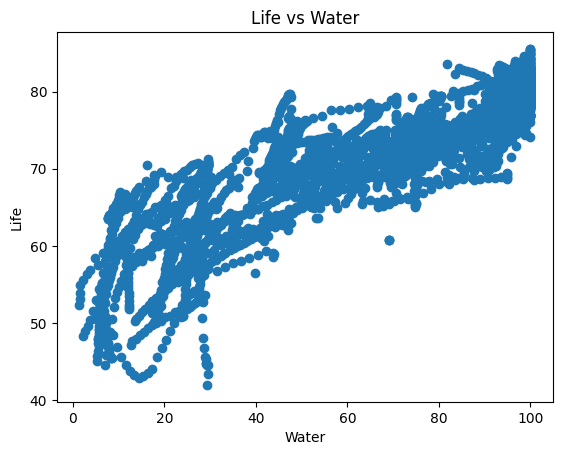

In [6]:

pd_merge = pd_merge.dropna()
pd_merge['Year'] = pd.to_numeric(pd_merge['Year'])
pd_merge['Water'] = pd.to_numeric(pd_merge['Water'])
pd_merge['Life'] = pd.to_numeric(pd_merge['Life'])
#plot data corralation between water and life
plt.scatter(pd_merge['Water'], pd_merge['Life'])
plt.xlabel('Water')
plt.ylabel('Life')
plt.title('Life vs Water')
plt.show()



In [7]:
try:
    fig = px.scatter(pd_merge, x='Water', y='Life', animation_frame='Year', animation_group='Country Name', size='Water', color='Country Name', hover_name='Country Name', log_x=True, size_max=55, range_x=[0.01,100], range_y=[25,90])
    fig.show()
except ValueError as e:
    print("Error:", e)


In [2]:
import pandas as pd
import plotly.express as px

# Load the CSV file
file_path = 'water_life.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values for water or life expectancy
data_clean = data.dropna(subset=['Water', 'Life'])

# Ensure 'Water' and 'Life' columns are numeric
data_clean['Water'] = pd.to_numeric(data_clean['Water'], errors='coerce')
data_clean['Life'] = pd.to_numeric(data_clean['Life'], errors='coerce')

# Round the 'Water' column to the nearest full percentage
data_clean['Water'] = data_clean['Water'].round()

# Group by the rounded 'Water' values and take the mean of 'Life' for each group
grouped_data = data_clean.groupby(['Year', 'Water'], as_index=False).agg({'Life': 'mean'})

# Create the bar plot using Plotly with a slider for years and set the bar color to purple
fig = px.bar(grouped_data, x='Water', y='Life', animation_frame='Year', 
             range_x=[0, 100],  # Adjust x-axis range for better visibility
             range_y=[0, 100],   # Adjust y-axis range for better visibility
             labels={'Water': 'Access to Water (%)', 'Life': 'Life Expectancy'},
             title='Life Expectancy vs. Access to Water Over the Years',
             color_discrete_sequence=['purple'])

# Show the plot
fig.show()


C:\Users\Thijn van Veen\AppData\Local\Temp\ipykernel_13828\2602754781.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Thijn van Veen\AppData\Local\Temp\ipykernel_13828\2602754781.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Thijn van Veen\AppData\Local\Temp\ipykernel_13828\2602754781.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv('datasets/water_life.csv')

fig = px.line(df, x='Water', y='Life', title='Thijn')

fig.show()


In [2]:
import pandas as pd
import plotly.express as px
pd_merge = pd.read_csv('water_life.csv')
pd_merge.dropna(inplace=True)

fig = px.scatter(pd_merge, x='Water', y='Life', animation_frame='Year', animation_group='Country Name', color='Country Name', hover_name='Country Name', size_max=55, range_x=[1,100], range_y=[0,90])
fig.show()